In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [47]:
df = pd.read_csv('sentiments.csv', header=0, index_col=0)
df.head()

,ind,aid,paper,author,date,url,sent,p_pos,p_neg
0,0,fox0,fox,['Adam Carrington'],2018-03-03 00:00:00,http://www.foxnews.com/opinion/2018/03/03/supr...,pos,0.995459,0.004541
1,1,fox1,fox,"['Kaitlyn Schallhorn', '- Jonas Oransky', 'Eve...",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/gun...,neg,0.236829,0.763171
2,2,fox2,fox,['Kathleen Joyce'],2018-03-03 00:00:00,http://www.foxnews.com/us/2018/03/03/cmu-stude...,pos,0.899592,0.100408
3,4,fox4,fox,['Gregg Re'],2018-03-02 00:00:00,http://www.foxnews.com/politics/2018/03/02/tru...,pos,0.998931,0.001069
4,5,fox5,fox,"['Brooke Singman', '- President Trump']",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/tru...,pos,0.999233,0.000767


In [48]:
grp=df.groupby('paper').mean()
grp['sentdiff']=grp['p_pos']-grp['p_neg']
papers = set(df['paper'])

In [49]:
grp

,ind,p_pos,p_neg,sentdiff
paper,,,,
atlantic,1531.877863,0.732416,0.267584,0.464832
blaze,1699.494152,0.676215,0.323785,0.352429
breitbart,1334.375000,0.673804,0.326196,0.347609
fox,988.916667,0.633744,0.366256,0.267487
huffpo,1348.053333,0.672732,0.327268,0.345463
inforwars,1509.355422,0.662066,0.337934,0.324132
msnbc,1708.478788,0.707671,0.292329,0.415343
npr,1761.176471,0.712623,0.287377,0.425245
nyt,1882.729814,0.704217,0.295783,0.408434


[Text(0,0,'inforwars'),
 Text(0,0,'breitbart'),
 Text(0,0,'wsj'),
 Text(0,0,'msnbc'),
 Text(0,0,'atlantic'),
 Text(0,0,'nyt'),
 Text(0,0,'blaze'),
 Text(0,0,'npr'),
 Text(0,0,'fox'),
 Text(0,0,'huffpo')]

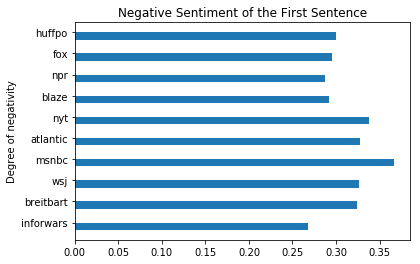

In [50]:
ind = np.arange(len(grp['p_neg']))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.barh(ind - width/2, grp['p_neg'], width)

ax.set_ylabel('Degree of negativity')
ax.set_title('Negative Sentiment of the First Sentence')
ax.set_yticks(ind)
ax.set_yticklabels(papers)


In [51]:
foxs=df[df['paper']=='fox']

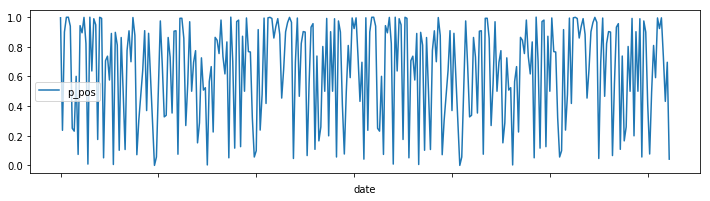

In [52]:
foxs.plot.line(x=foxs.date, y='p_pos', figsize=(12,3))

In [53]:
nprs=df[df['paper']=='npr']
nprs.head()

,ind,aid,paper,author,date,url,sent,p_pos,p_neg
947,1077,npr0,npr,[],2018-03-01 00:00:00,https://www.npr.org/2018/03/01/589684523/fact-...,pos,0.992962,0.007038
948,1078,npr1,npr,['Rebecca Hersher'],2018-03-02 00:00:00,https://www.npr.org/sections/health-shots/2018...,pos,0.988823,0.011177
949,1080,npr3,npr,['Scott Neuman'],2018-03-01 00:00:00,https://www.npr.org/sections/thetwo-way/2018/0...,pos,0.982170,0.017830
950,1081,npr4,npr,"['Colin Dwyer', 'Camila Domonoske', 'Emily Sul...",2018-02-28 00:00:00,https://www.npr.org/sections/thetwo-way/2018/0...,pos,0.681732,0.318268
951,1084,npr7,npr,['Emily Sullivan'],2018-02-28 00:00:00,https://www.npr.org/sections/thetwo-way/2018/0...,pos,0.991584,0.008416


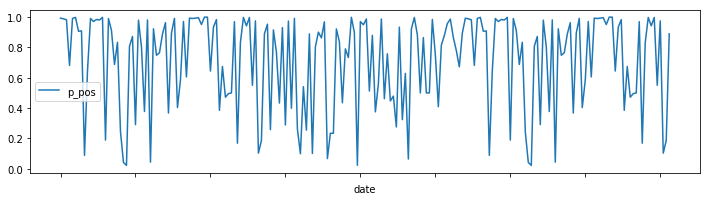

In [54]:
nprs.plot.line(x=nprs.date, y='p_pos', figsize=(12,3))

In [55]:
fox_pos=df[(df['paper']=='fox') & (df['p_pos']>.75)]

In [56]:
df_content = pd.read_csv('cleandataset.csv', header=0, index_col=0)
df_content.head()

,aid,paper,author,date,url,content,clean_content
0,fox0,fox,['Adam Carrington'],2018-03-03 00:00:00,http://www.foxnews.com/opinion/2018/03/03/supr...,The debate about how to deal with guns in our ...,"['debate', 'deal', 'gun', 'country', 'rage', '..."
1,fox1,fox,"['Kaitlyn Schallhorn', '- Jonas Oransky', 'Eve...",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/gun...,In the weeks after a gunman walked into a high...,"['week', 'gunman', 'walked', 'high', 'school',..."
2,fox2,fox,['Kathleen Joyce'],2018-03-03 00:00:00,http://www.foxnews.com/us/2018/03/03/cmu-stude...,The 19-year-old student suspected of killing h...,"['19-year-old', 'student', 'suspected', 'killi..."
4,fox4,fox,['Gregg Re'],2018-03-02 00:00:00,http://www.foxnews.com/politics/2018/03/02/tru...,Just one day after putting the NRA on the defe...,"['one', 'day', 'putting', 'nra', 'defensive', ..."
5,fox5,fox,"['Brooke Singman', '- President Trump']",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/tru...,President Trump has touched off new tensions w...,"['president', 'trump', 'ha', 'touched', 'new',..."


In [60]:
df_content_fox = df_content[df_content['paper']=='fox']
df_content_fox.head()

,aid,paper,author,date,url,content,clean_content
0,fox0,fox,['Adam Carrington'],2018-03-03 00:00:00,http://www.foxnews.com/opinion/2018/03/03/supr...,The debate about how to deal with guns in our ...,"['debate', 'deal', 'gun', 'country', 'rage', '..."
1,fox1,fox,"['Kaitlyn Schallhorn', '- Jonas Oransky', 'Eve...",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/gun...,In the weeks after a gunman walked into a high...,"['week', 'gunman', 'walked', 'high', 'school',..."
2,fox2,fox,['Kathleen Joyce'],2018-03-03 00:00:00,http://www.foxnews.com/us/2018/03/03/cmu-stude...,The 19-year-old student suspected of killing h...,"['19-year-old', 'student', 'suspected', 'killi..."
4,fox4,fox,['Gregg Re'],2018-03-02 00:00:00,http://www.foxnews.com/politics/2018/03/02/tru...,Just one day after putting the NRA on the defe...,"['one', 'day', 'putting', 'nra', 'defensive', ..."
5,fox5,fox,"['Brooke Singman', '- President Trump']",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/tru...,President Trump has touched off new tensions w...,"['president', 'trump', 'ha', 'touched', 'new',..."


In [58]:
#join this dataset on the aid, but from df_content_fox, only keep content & clean content